In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (20, 6)

In [3]:
mobile_sales = pd.read_excel('mobilesales.xlsx')

In [4]:
mobile_sales.set_index('DATE',inplace=True)
mobile_sales

,Sales
DATE,
2001-01-01,6519.0
2001-02-01,6654.0
2001-03-01,7332.0
2001-04-01,7332.0
2001-05-01,8240.0
...,...
2018-09-01,13838.0
2018-10-01,15351.0
2018-11-01,15615.0


<Axes: xlabel='DATE'>

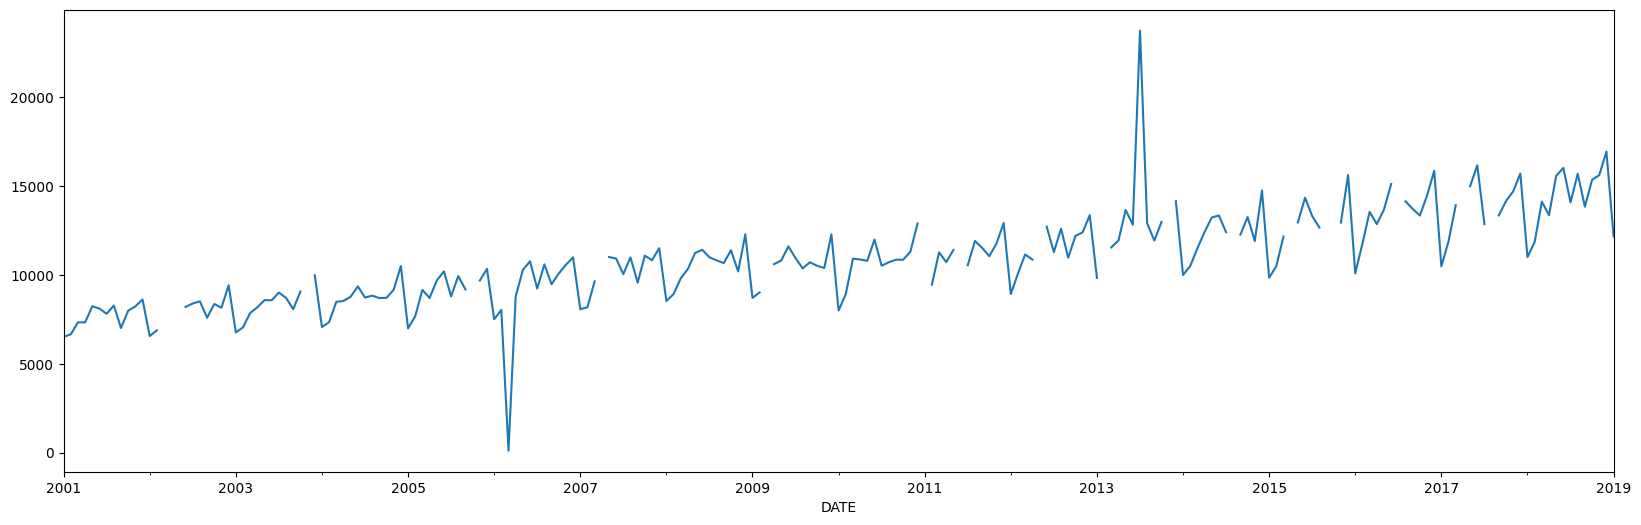

In [5]:
mobile_sales.Sales.plot()

In [6]:
mobile_sales.isna().sum()

Sales    19
dtype: int64

### Empty Rows

In [7]:
mobile_sales.loc[mobile_sales.Sales.isna()]

,Sales
DATE,
2002-03-01,NaN
2002-04-01,NaN
2002-05-01,NaN
2003-11-01,NaN
2005-10-01,NaN
2007-04-01,NaN
2009-03-01,NaN
2011-01-01,NaN
2011-06-01,NaN


In [8]:
mobile_sales.mean()

Sales    10842.757576
dtype: float64

In [9]:
mobile_sales.median()

Sales    10745.0
dtype: float64

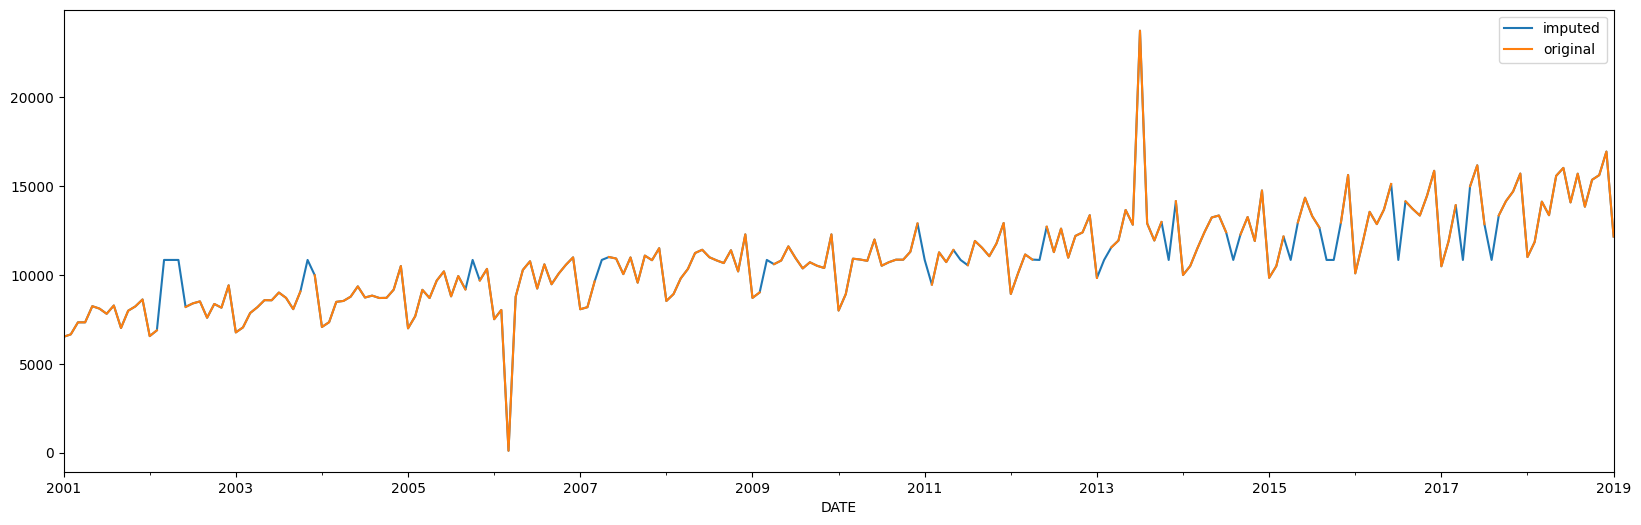

In [10]:
mobile_sales.Sales.fillna(mobile_sales.Sales.mean()).plot(label = 'imputed')
mobile_sales.Sales.plot(label='original')
plt.legend()

Imputation with 0

<Axes: xlabel='DATE'>

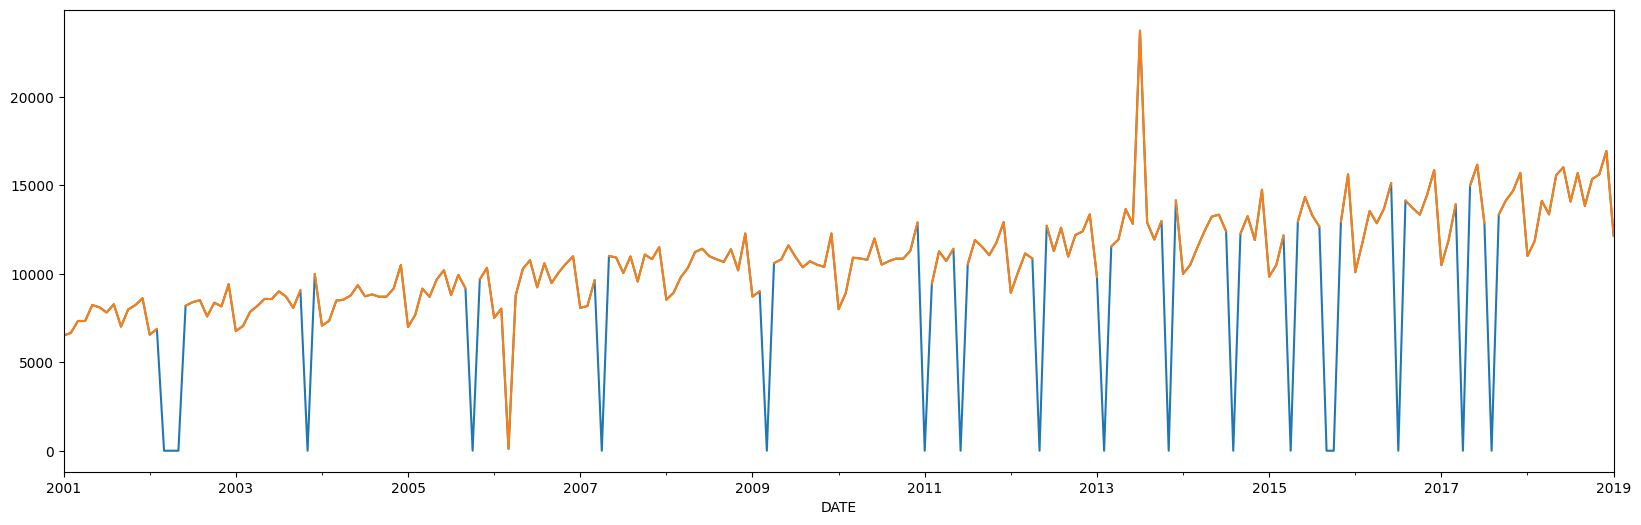

In [11]:
mobile_sales.Sales.fillna(0).plot(label='imputed')
mobile_sales.Sales.plot(label = 'original')

Linear Interpolation

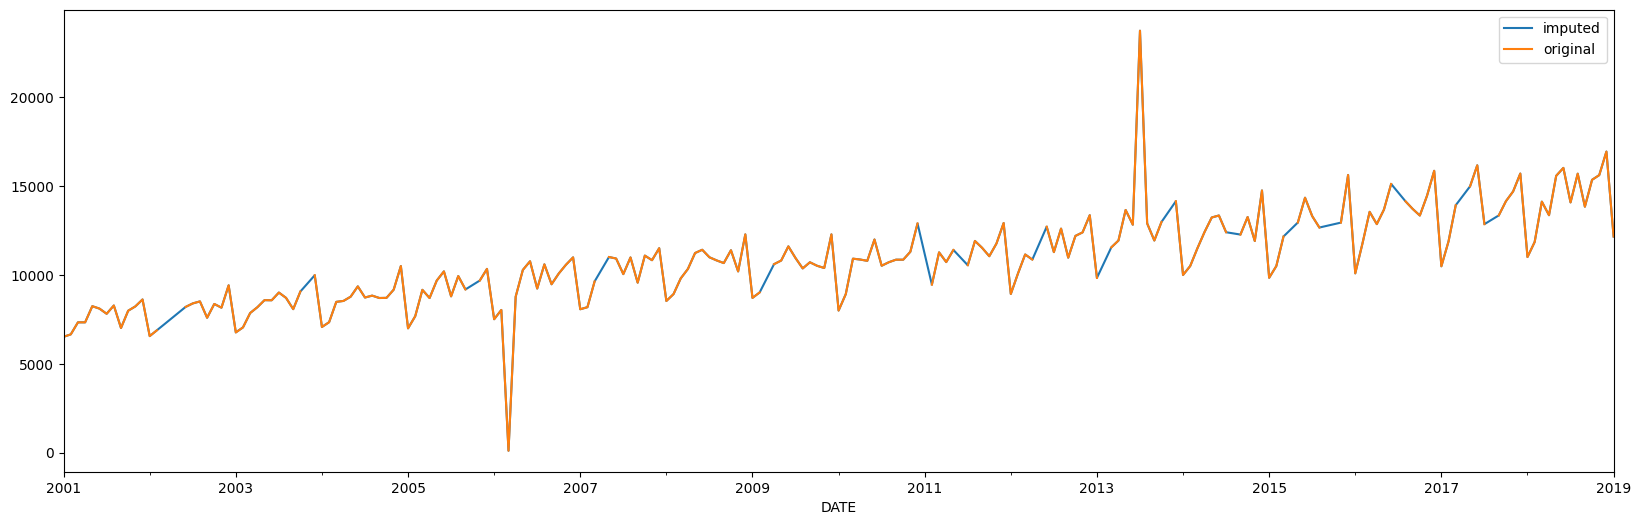

In [12]:
mobile_sales.Sales.interpolate(method= 'linear').plot(label='imputed')
mobile_sales.Sales.plot(label = 'original')
plt.legend()

In [13]:
mobile_sales.Sales = mobile_sales.Sales.interpolate(method= 'linear')
mobile_sales.Sales

DATE
2001-01-01     6519.0
2001-02-01     6654.0
2001-03-01     7332.0
2001-04-01     7332.0
2001-05-01     8240.0
               ...   
2018-09-01    13838.0
2018-10-01    15351.0
2018-11-01    15615.0
2018-12-01    16941.0
2019-01-01    12160.0
Name: Sales, Length: 217, dtype: float64

## Visualizing Data to Detect Outliers

array([[<Axes: title={'center': 'Sales'}>]], dtype=object)

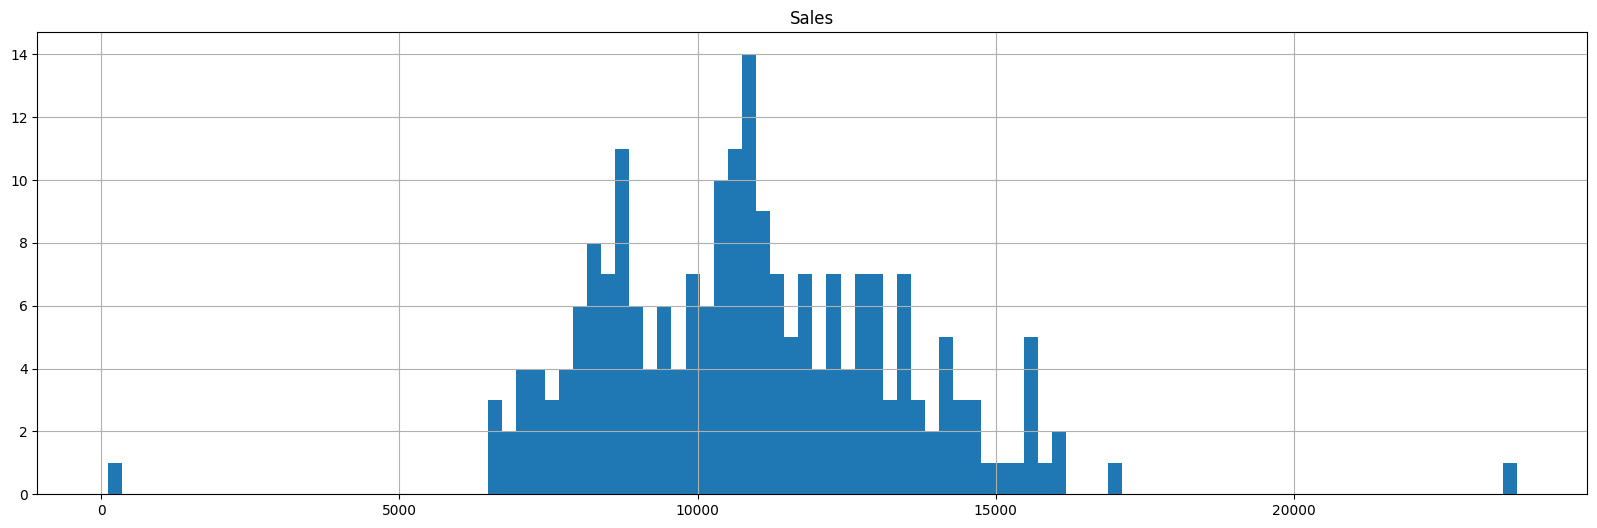

In [14]:
mobile_sales.hist(bins=100)


From the plot, we can clearly see the anomalies.

We can easily decide where to cut the data, in order to get rid of anomalies.

For instance, We can replace all the  values<5000  by 5000 and all the  values>20,000  by 20,000

Q. But what would we do if this histogram plot was more continuous?

Then we would not know where to cut the data.

### Concept of quantiles to help deal with anomalies

In [15]:
mobile_sales.Sales.describe()

count      217.000000
mean     10873.046083
std       2571.620954
min        108.000000
25%       8923.000000
50%      10793.000000
75%      12555.500000
max      23740.000000
Name: Sales, dtype: float64

Q. How do we determine anomalies using concept of percentile? Generally, we rule out an observation as an anomaly, if it is greater than 95 percentile, or less than 5 percentile.

In [16]:
mobile_sales.quantile(0.95), mobile_sales.quantile(0.05)

(Sales    15164.6
 Name: 0.95, dtype: float64,
 Sales    7307.8
 Name: 0.05, dtype: float64)

This means that only 5% of the values in our signal are less than 7307.8, or that about 95% values are higher than this value.



## Clipping the outliers

<Axes: xlabel='DATE'>

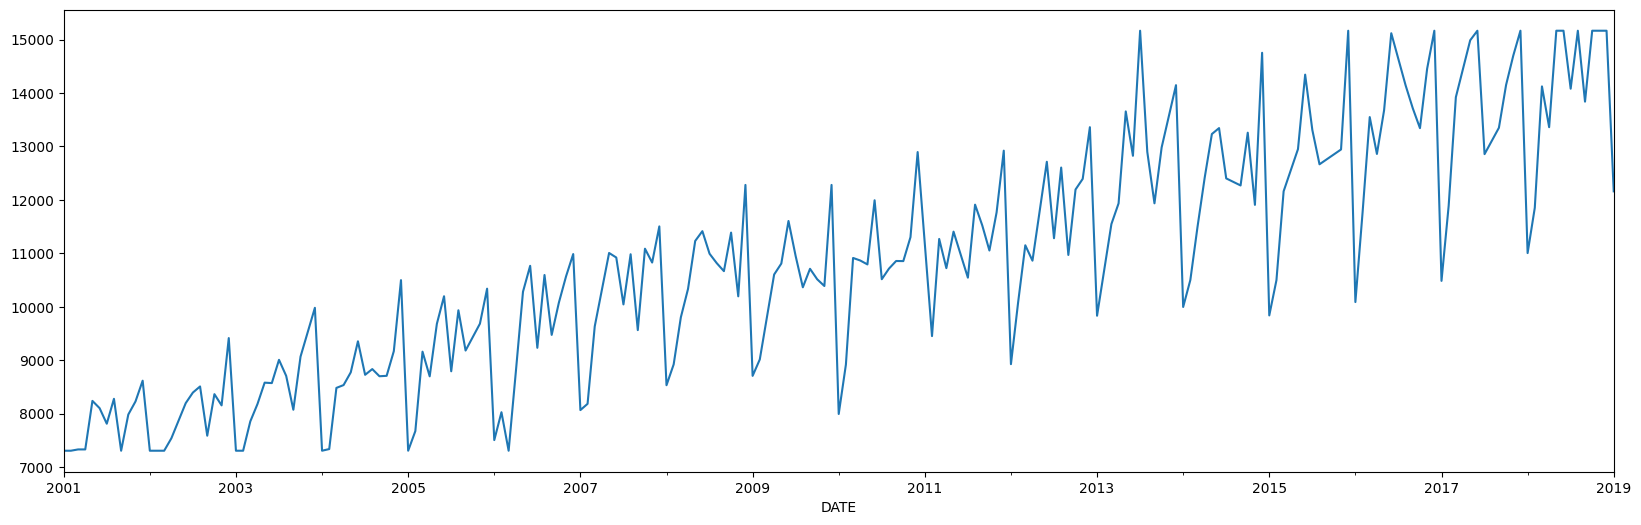

In [58]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

<Axes: xlabel='DATE'>

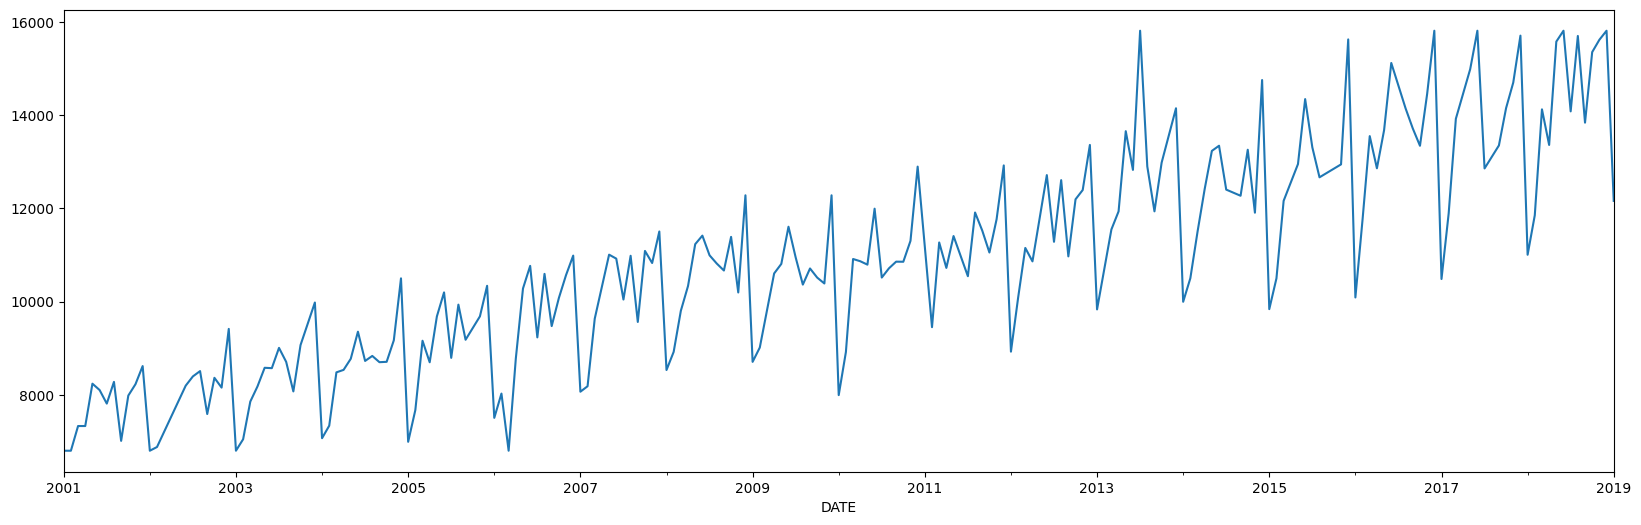

In [18]:
mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02)).plot()

Q. What kind of information can we get by looking at the time series plot?
By observing the time series plot, we can now answer certain questions about the data:-

Does it have a trend? Is it growing or decreasing?

We can see that the sales seem to be growing every year
Is the brand making more revenue every year?

Yes
Are there any repeating patterns?

There are repeating patterns
Some peaks and some minimas seem to be repeating themselves

Q. What do the repeating patterns indicate?

This is domain-specific. Depends on what domain the time series is about.

For our use case, we can say that perhaps around Februray the trend seems to be that sales drop down. But they seem to pick up around October-December, perhaps due to the festive season.

A good forecaster should be aware of such trends in their domain, and why these trends occur.

For example,

For a retail company, it would be expected to have spikes on Sunday, and perhaps a dip on Mondays.
For a company manufacturing sweaters, it would be expected to see a spike in the months December-January (peak winter) and have a dip in the hotter months


Moving Averages
Q. What if we take average of the last two data points in our series ( xk−2  and  xk−1 ), and use it guess tha next point at t=k

This seems like a smart approach.

This would ensure that we do not get a straight line for forecasts, and that the forecasted value is unique.

Expanding on this approach,

Q. What if we take average of say, n past observations to give our forecast for time t=k?

This approach is called as Moving Average.

The value of n acts as a hyperparameter, that we can set based on what works best for us.

The following plot shows the moving average for n=3, 7 and 10

Q. Why is it called "Moving" average?

To predict the value at time  t+1 , we take average for values from time  t−n  to  t 
Similarly, to predict the value at time  t+2 , we take average for values from time  t+1−n  to  t+1 
... and so on

Since we fix the window size as  n , the window will move as we move to forecast values.

Q. What are the characteristics of Moving Averages?

As our time series goes up, the moving average also goes up. Conversely, when the time series go down the moving average also goes down

This way, it can respond to new changes quickly.

This is the benefit of Moving averages. We don't get this advantage with any other method.



As of now, we're giving all the previous observations equal weights, while calculating the average.

Q. What if we assign different weights to different observations?

This is a smarter extension of the Moving Averages idea. This is called Weighted Moving Average (WMA).

A Weighted Moving Average puts more weight on recent data and less on past data.

This is done by multiplying each observation point by a weighting factor.

Because of its unique calculation, WMA will follow the data more closely than a corresponding Simple Moving Average.



<Axes: xlabel='DATE'>

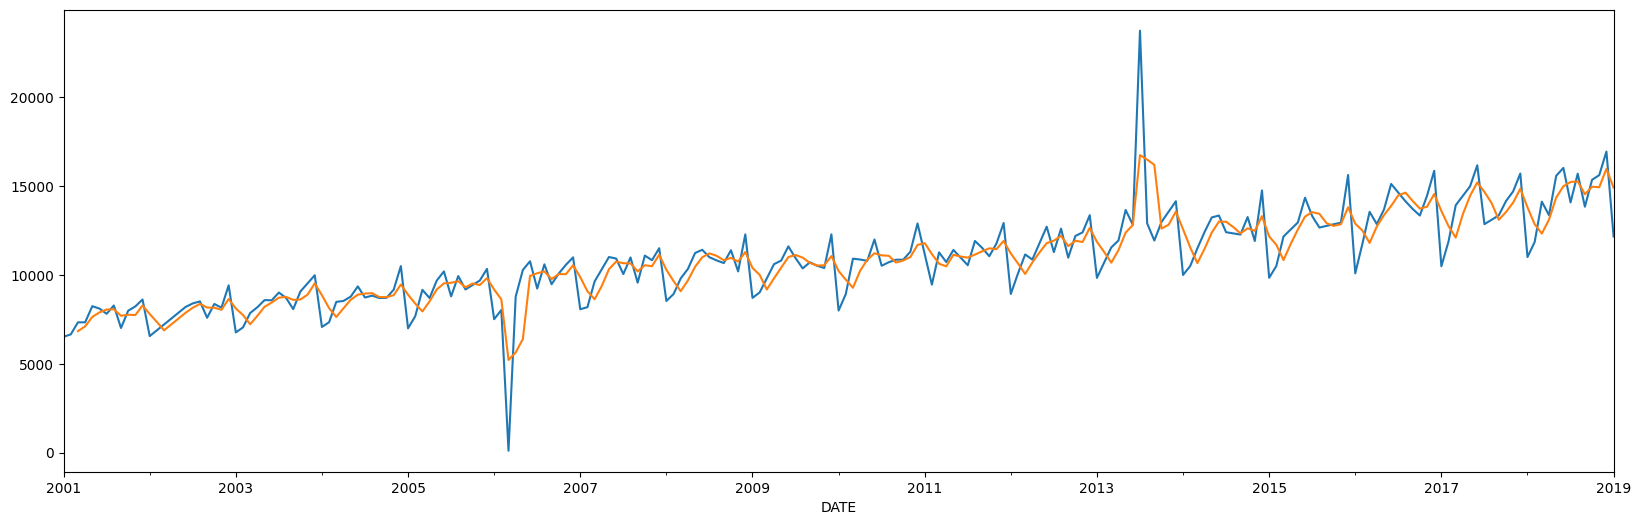

In [19]:
mobile_sales.Sales.plot(label = 'original')
mobile_sales.Sales.rolling(3, center=False).mean().plot(label = 'smoothed')

Q. What observations can we make from this plot?

We can see that the smoothed series is lagging.
Notice that both maximas and minimas are lagging by 3 units along x axis. This is because our rolling window was 3.
Benefit of this is, if the time series value changes suddenly, the smoothed series would change a few days/weeks/months later.
Thereby, adjusting to the new level.
Less-spikey
Notice that there are some missing values in the beginning
This makes sense, since our window size=3, the very first MA value we can get is after 3 data points.

Q. What if we take window size = 1?

In this case, the smoothed series should be exactly same as the original time series.

<Axes: xlabel='DATE'>

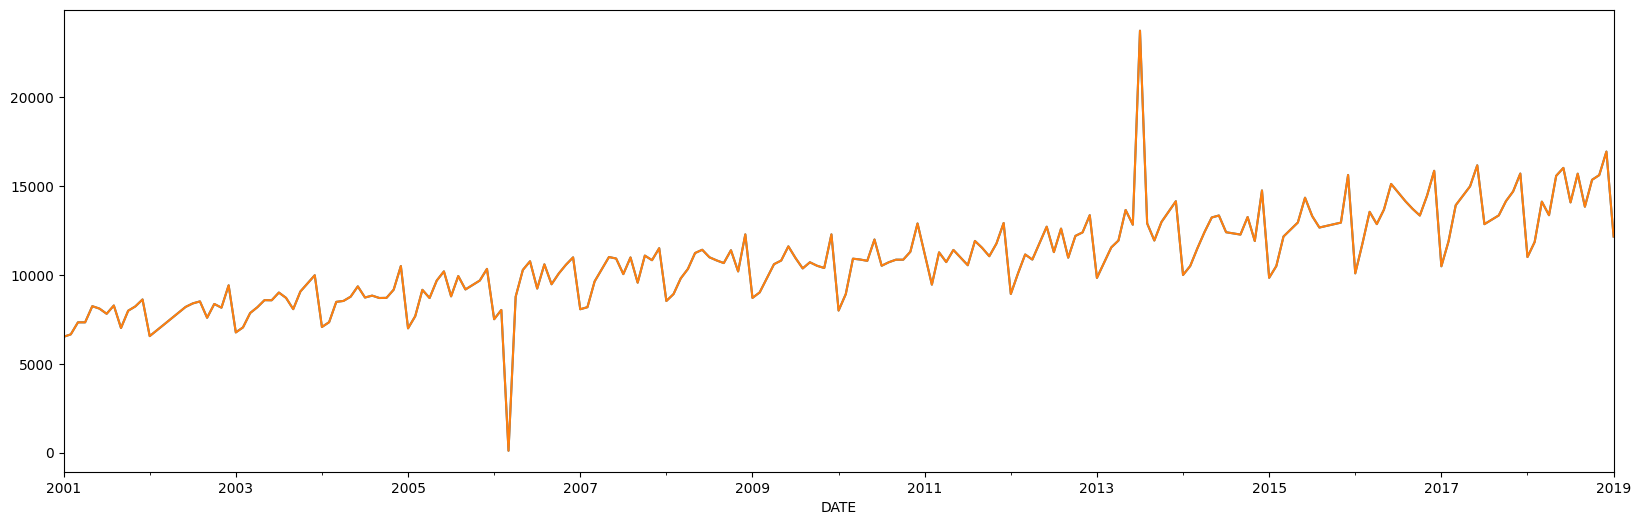

In [20]:
mobile_sales.Sales.plot(label = 'original')
mobile_sales.Sales.rolling(1, center=False).mean().plot(label = 'smoothed')

Q. What would happen if we take a higher window size value?

It would go through the center.

The results would be much less noisy in nature.

We would be missing 12 values from the beginning of MA plot line

<Axes: xlabel='DATE'>

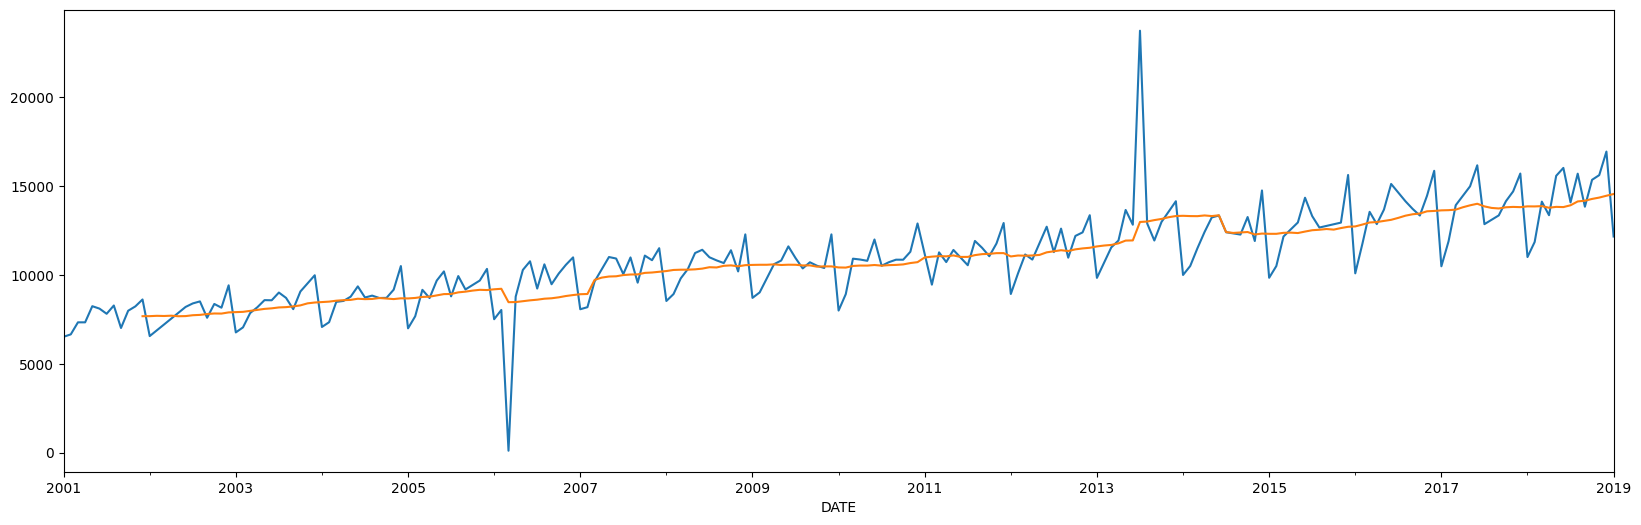

In [21]:
mobile_sales.Sales.plot(label = 'original')
mobile_sales.Sales.rolling(12, center=False).mean().plot(label = 'smoothed')

Q. Can we adopt a more centered approach for Moving Averages?

Yes and No.

Theoretically, instead of taking average of the last n data points, we can take average of n points before the current point, and n points after the current point.

This is the centered approach.

Naturally, we can't use this in forecasting as the future values are not available.

However, if we are just smoothing as preprocessing, we can adopt this centered approach.

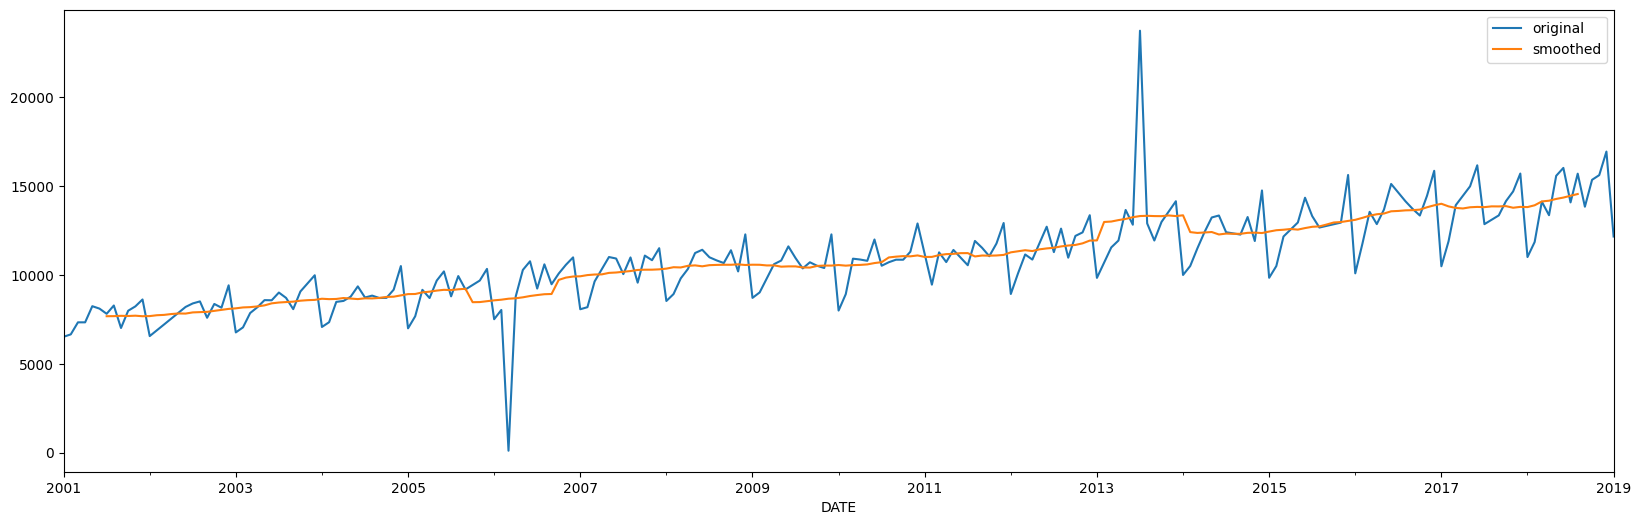

In [22]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(12, center=True).mean().plot(label='smoothed')
plt.legend()

Q. What observations can we make from the plot?

Notice that some values are missing in the beginning and in the end.

We're missing 6 entries in both beginning and in end to be precise, since the window size is 12.


Q. What if we put center=False inside the rolling method?

In that case, we would find that we're missing all 12 values in the beginning, and none in the end.

Q. What is meant by trend in a time series?

Trend can be thought of as the linear increasing or decreasing behavior of the series over a long period of time.

When we say that a time series is increasing or decreasing, we're actually talking about it's trend.

A trend can be:-

Uptrend
Downtrend
Can be up and down, need not be a straight line

Q. Is trend fixed for a time series?

No.

Trend usually happens for some time and then disappears, it does not repeat.

For example, some new song comes, it goes trending for a while, and then disappears.

Sometimes we refer to a trend as “changing direction”, when it might go from an increasing trend to a decreasing trend, or vice versa.


Q. What is a trend line?
Assumming that trend is not repeating, Trend line is a smooth predictable function that traces the trend of a time series, and can help us predict the time series indefinitely in the future.

The term "line" is misleading as it may or may not be linear.

For example, the following graph depicts a series in which there is an obvious upward trend over time. The trend line for this series is shown in blue.

## Calculating Trend

1. We already saw one way of calculating the trend line, by using mean() method over pandas.rolling() by fixing appropriate window size.
For our usecase, since we're looking at monthly data, 12 is a good window size
This is nothing but smoothing the original time series. We Hvae chosen to take centered moving average to represent trend this choice can be subjective

You can take period to be 1 year or 2 years. It should be big enough to remove (smooth) all the other factors such as noise / seasoanlity / etc.


Another way of calculating trend is to just fit Linear Regression on these points.

This seems quite intuitive.

Recall Linear Regression lecture.

Here, our independant variable is time (t), so suppose it ranges from 0 to m, and is equally spaced, our formula for regression becomes:

y^t+1=mt+c , where c is a constant.

This becomes our trend line!

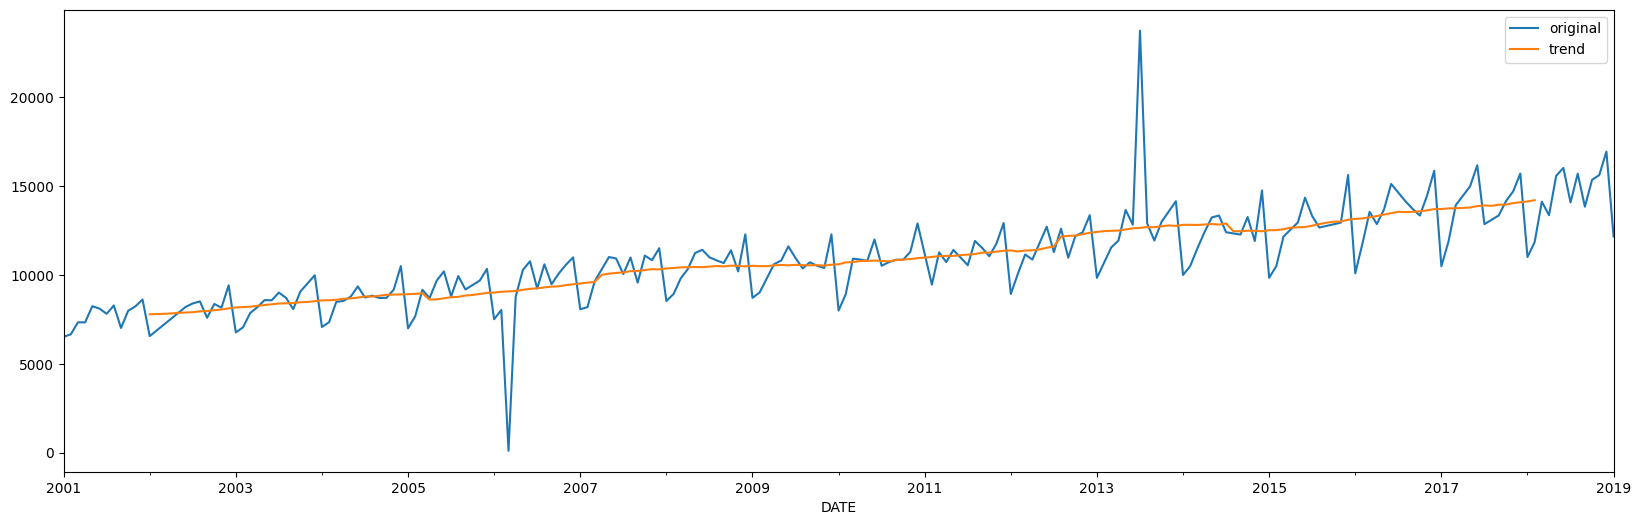

In [23]:
mobile_sales.Sales.plot(label='original')
mobile_sales.Sales.rolling(24, center=True).mean().plot(label='trend')

plt.legend()

Q. What is seasonality in times series?

Seasonality in time-series data refers to a pattern that occurs at a regular interval.

It can be called just a simple repeating wave.

Making copies of seasonality can fetch us our time series.

Seasonality is always of a fixed and known period.

In fact, our assumption that we can predict a time series, is due to the fact that it is repeatable.


Q. When do we see seasonality?

A seasonal pattern occurs when a time series is affected by seasonal factors such as the time of the year or the day of the week.

Hourly pattern

People would tend to buy mobile phones during specific working hours
We can expect an increase in sales in the evening
There would be different patterns observed in morning and at night.
Weekly pattern

Sales would be higher on week ends, and less on weekdays
Weather pattern

This is category based, meaning that would be evident for specific categories. For ex:
Sweaters would have higher sales in winters, and sunglasses would have a higher sale in summers, and so on..
Yearly Pattern

There would also be a yearly pattern. This is influenced by the holiday season.
Sales would shoot up during holidays like Diwali, Christmas

Q. How can we calculate seasonality?
Step-1: Calculate trend and subtranct it from the original time series
Step-2: From the result, take the avergae of all periods. For eg:
If it is monthly time series for 4 years, then you have 4 Jan, 4 Feb, 4 Dec etc.
Take the avg of all Jans, Febs, etc.

So we can easily calculate it manually. But lets see how this can be done using statsmodels

Time series Decomposition
Generally, a complex formula or equation can be broken down into simple equations. For instance, concepts of Fourier transforms, Neural Networks, etc.

We've already studied about two components of a time series: Trend and Seasonality.

Q. Can we break down our time series into it's components?

Yes. This process is called Time Series Decomposition.

A time series is made up of simple components which we can estimate

Trend
Seasonality
These are the two important components which we want to decompose our signal into

This is also called as Error Trend Seasonality Decomposition

Q. If we add the trend and seasonality of a time series, will we obtain the original time series?

In an ideal situation, yes.

But we know that in real life, we hardly get ideal cases.

Practically, we will also have noise/error/residual in the data.

This prevents the time series from being a perfect sum of trend and seasonality. It is not a perfect function.


Q. How is the Time series decomposition formulated?
y(t)=b(t)+s(t)+e(t) 
Where,
b(t)  -> trend of signal
s(t)  -> seasonality
e(t)  -> error term


We can relate the concept of Time Series Decomposition to linear regression.

Consider we have d independent features:  x1,x2,...,xd 
Consider we have weights values:  w0,w1,w2,...,wd 
and an irreducible error:  b 
Then the formulation of linear regression becomes:-  yi=w0+w1xi1+w2xi2+...+wkxik+wk+1xi(k+1)+...wdxid+bi 

We can say that the terms  w1xi1+w2xi2+...+wkxik  represent the trend of time series:  b(t) 
And that the terms  wk+1xi(k+1)+...wdxid  represent the seasonality of time series:  s(t) 
The terms  w0+bi  together constitute the error/residual value of time series:  e(t)

Residual
Q. How can we calculate the residual values?

Error term is just computed as
e(t)=y(t)−b(t)−s(t)

It is not estimated, though it can be computed using the same formulation.

It is based on the real values that we have.


Q. What does the error term look like on plotting?

Assuming that the trend and seasonality components obtained are a good estimate, then the errors would be small and would be scattered around zero.

If we look at a histogram of errors, there are two possibilities

We observe a narrow normal distribution along the y-axis

This is good. Means that we do not need to worry about errors.
Smaller the standard deviation, the better!
We observe a skewed distribution

This means we're missing a constant term in our formulation.
Implies,  y(t)=b(t)+s(t)+e(t)+c , where c is constant term.

Q. Can the residual values have any pattern in their plot? If yes, then in what cases?

Yes.

Sometimes the residuals might have a trend and/or seasonality.

This can happen when

We had multiple seasonalities in the time series
Or, if the trend detection was incorrect.

Q. What should we do if a pattern exists in residual values?

In such a case, we treat the residual values as a separate/new time series, and then try to forecast this new time series, by decomposing it into it's own trend, seasonality and error terms.

This creates a "nested forecast" of sorts.

If we again obtain a residual term that has a pattern, we further treat that as the new series.

All these nested models can be very different from each other.


Q. How will we formulate this case mathematically?

Consider that we're forecasting a time series A, so we have

yA(t)=bA(t)+sA(t)+eA(t) 

It is found that residual term for signal A,  eA(t)  has a pattern of it's own.

So, we break down  eA(t)  further by treating it as a new time series, lets call it series B. So formulation becomes:

yA(t)=bA(t)+sA(t)+bB(t)+sB(t)+eB(t) 

This can go on further, based on the nature of  eB(t)

Q. Would Additive Seasonality Decomposition still work?

No.

In this case, we will not obtain the time series by adding the trend and seasonality components with each other, as per our specifications.


Q. How can we accomodate for this increasing amplitude in the seasonality component?

Instead of adding the trend and seasonality components, if we multiply them, then we would obtain a time series in which the amplitude of the seasonal component is increasing with increasing trend.

This is called Multiplicative Seasonality Decomposition.

It can be written as

y(t)=b(t)∗s(t)∗e(t) 

e(t)=y(t)b(t)∗s(t)

Q. Is there any realation between additive and multiplicative model?

Consider the multiplicative model:  y(t)=b(t)∗s(t)∗e(t) 

If we take log transform of both sides, we get a form of the additive model:  log(y(t))=log(b(t))+log(s(t))+log(e(t))

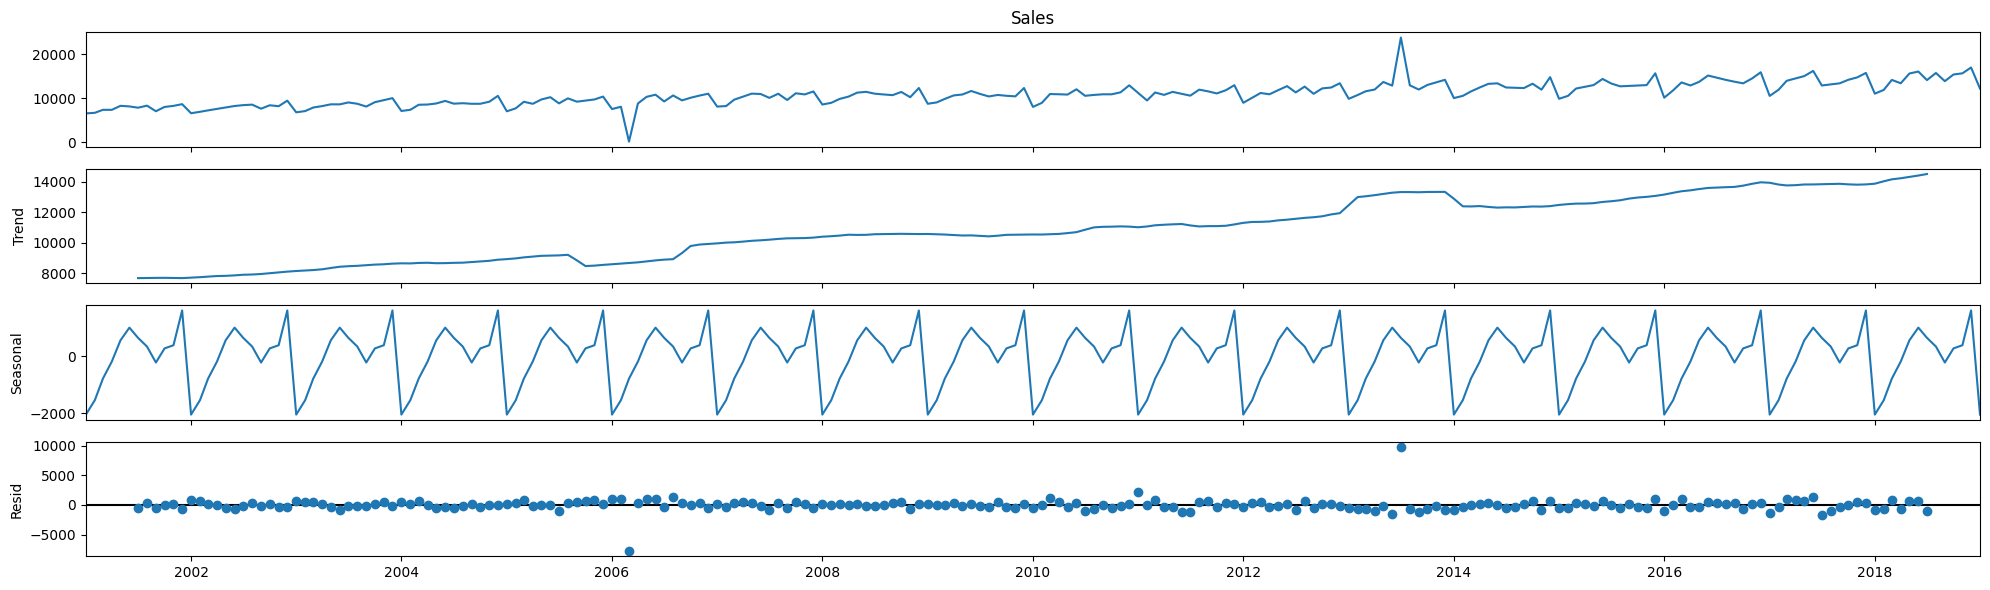

In [24]:
# By default, we get the plot twice with this functionality
# We add ; to avoid seeing the plot

model = sm.tsa.seasonal_decompose(mobile_sales.Sales, model='additive')
model.plot();

This plot is divided in 4 sections

The actual time series data
Trend
Notice the missing values in beginnning and end
Even statsmodel has used centered approach to calculate moving average
Seasonality
We can see that the exact same pattern is getting repeated every year.
This was obtained by subtracting trend from real series, and taking average over every month.
Residual values

Coming back to the additive model, lets take a look at the residuals plot only.

Q. How can we retrieve ONLY the residual plot from the model?

We can simply use resid keyword to access residual values from the model, and then plot it.

<Axes: xlabel='DATE'>

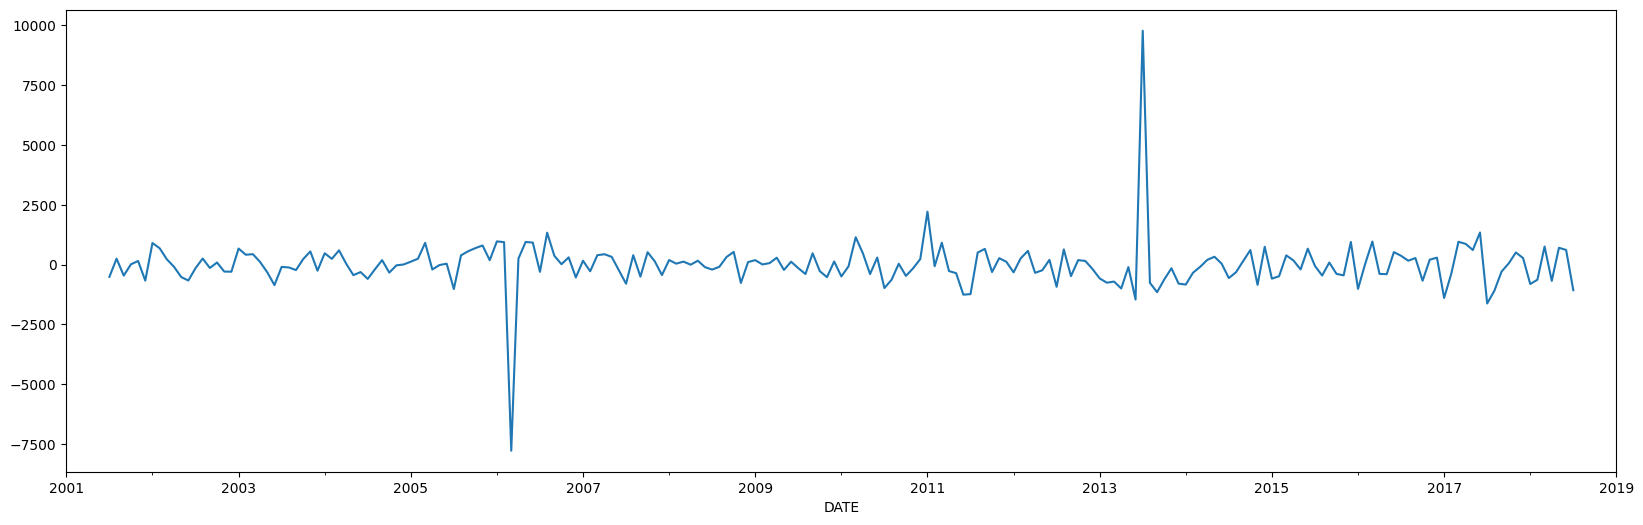

In [25]:
model.resid.plot()

You may think that this is a new time series, and then might want to forecast for this as well.

But notice the minimum and maximum errors we're getting here (-2000 and 3000 respectively). Scale of the residuals is ~5% of the actuals
Q. How can we check if this error is symmetric?

We can plot a histogram for residuals, to understand the distribution of these values.



<Axes: >

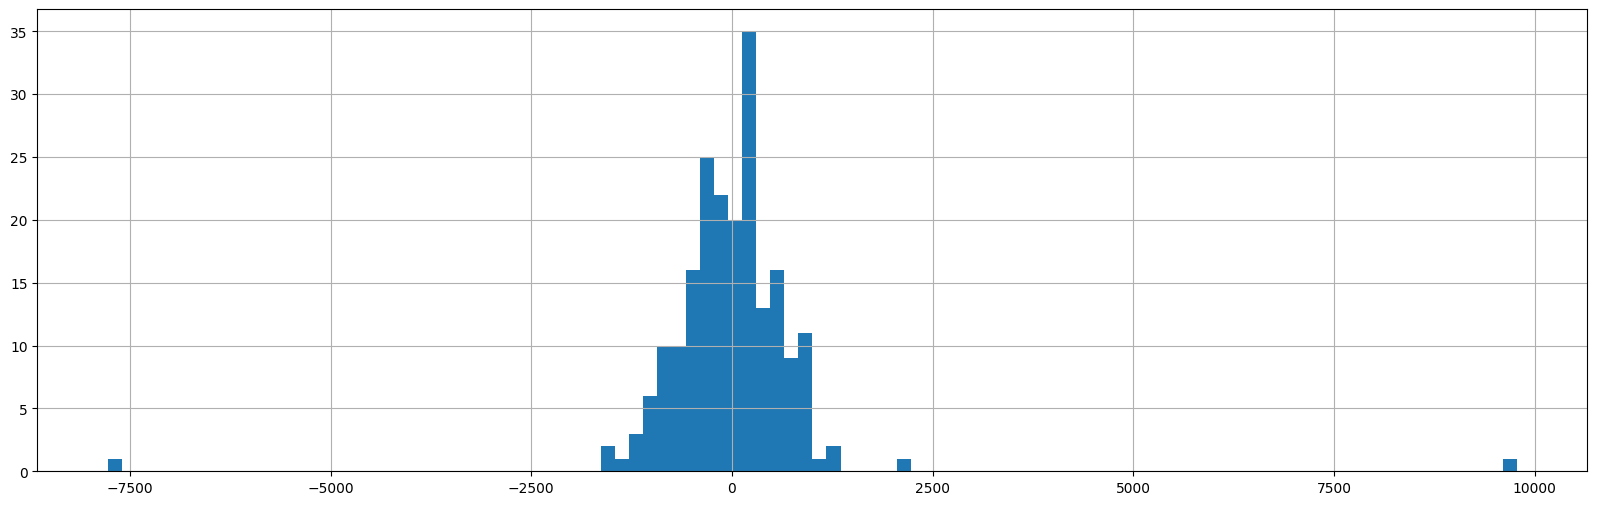

In [26]:
model.resid.hist(bins=100)

This still doesn't look perfectly symmetric

Q. How do we know when to not take further forecast of the residuals?

We can stop the forecasting of the residual once your residual mean is close to zero.

Let's check this value for our usecase.

In [27]:
model.resid.mean()

np.float64(-5.492136437908182)

In a data with values ranging from -2000 to 3000, a residual mean of -5.4 is very close to zero.

So we are neither overforecasting nor underforecasting.

Decomposition from Scratch
Trend_temp

<Axes: xlabel='DATE'>

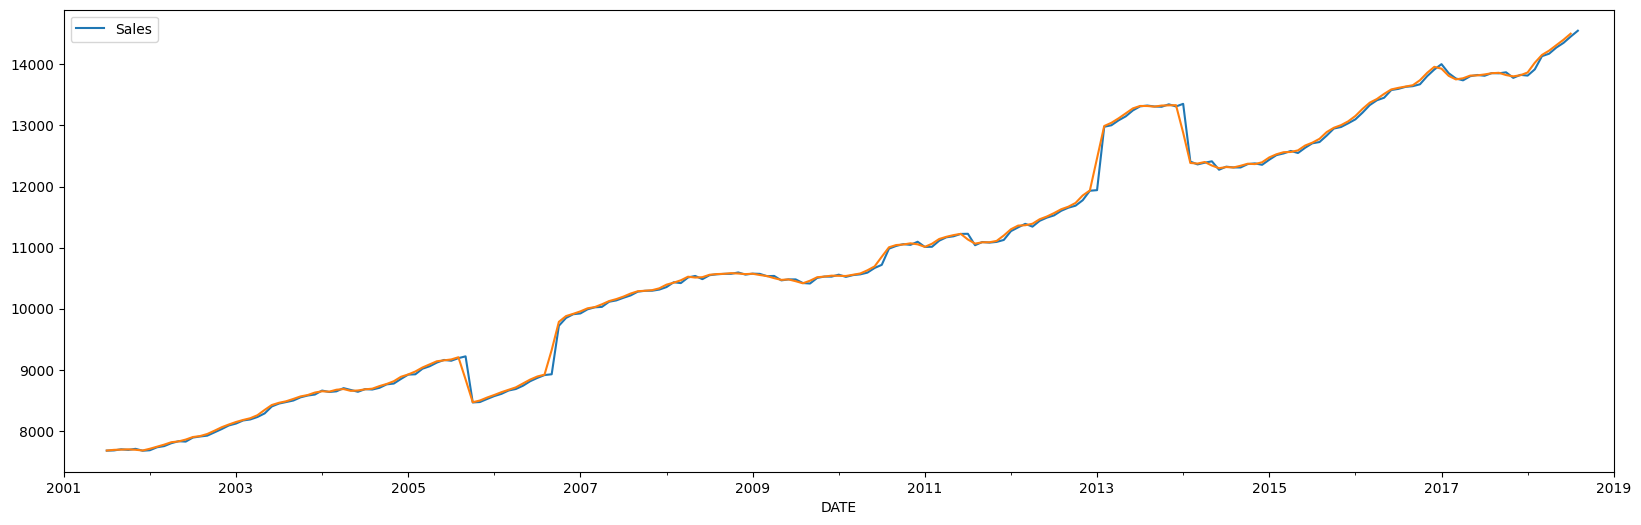

In [28]:
trend = mobile_sales.rolling(12, center=True).mean()
trend.plot()
model.trend.plot()

<Axes: xlabel='DATE'>

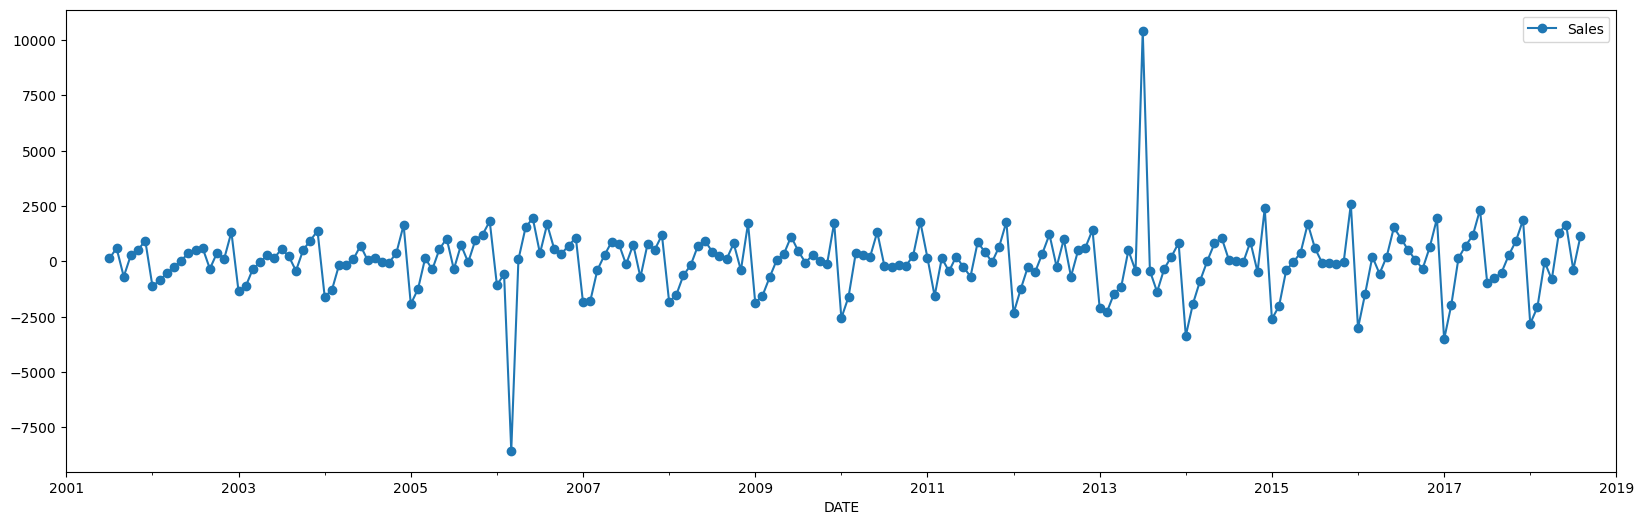

In [29]:
de_trend = mobile_sales - trend
de_trend.plot(style = '-o')

<Axes: xlabel='DATE'>

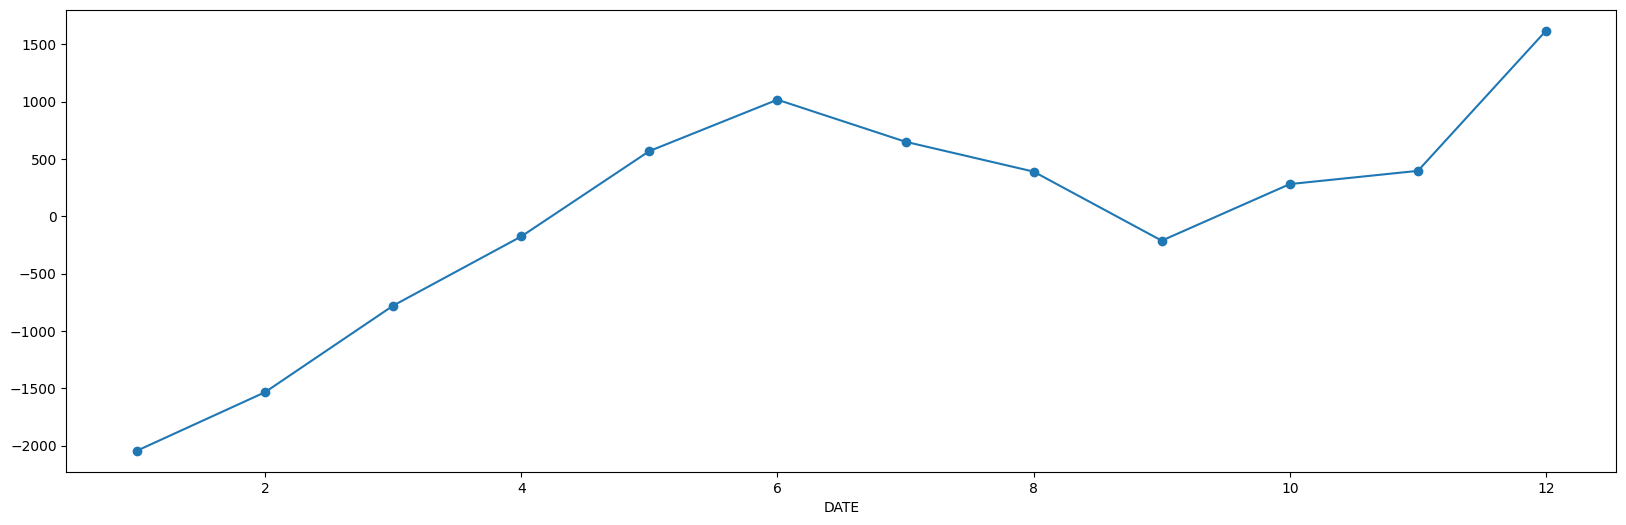

In [30]:
dft = de_trend.reset_index()
dft.groupby(dft.DATE.dt.month)['Sales'].mean().plot(style = '-o')

In [31]:
dft.DATE.dt.month

0       1
1       2
2       3
3       4
4       5
       ..
212     9
213    10
214    11
215    12
216     1
Name: DATE, Length: 217, dtype: int32

C:\Users\ryanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


<Axes: xlabel='DATE'>

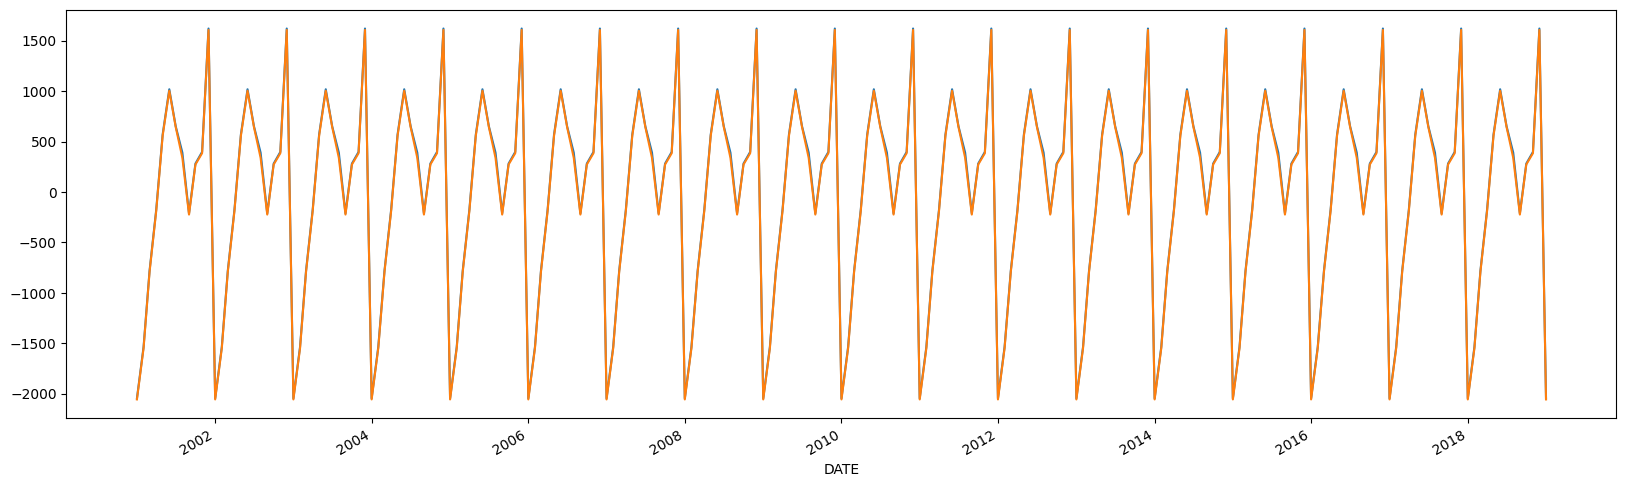

In [32]:
plt.plot(dft.DATE, dft.groupby(dft.DATE.dt.month)['Sales'].transform('mean'))
model.seasonal.plot()

<Axes: >

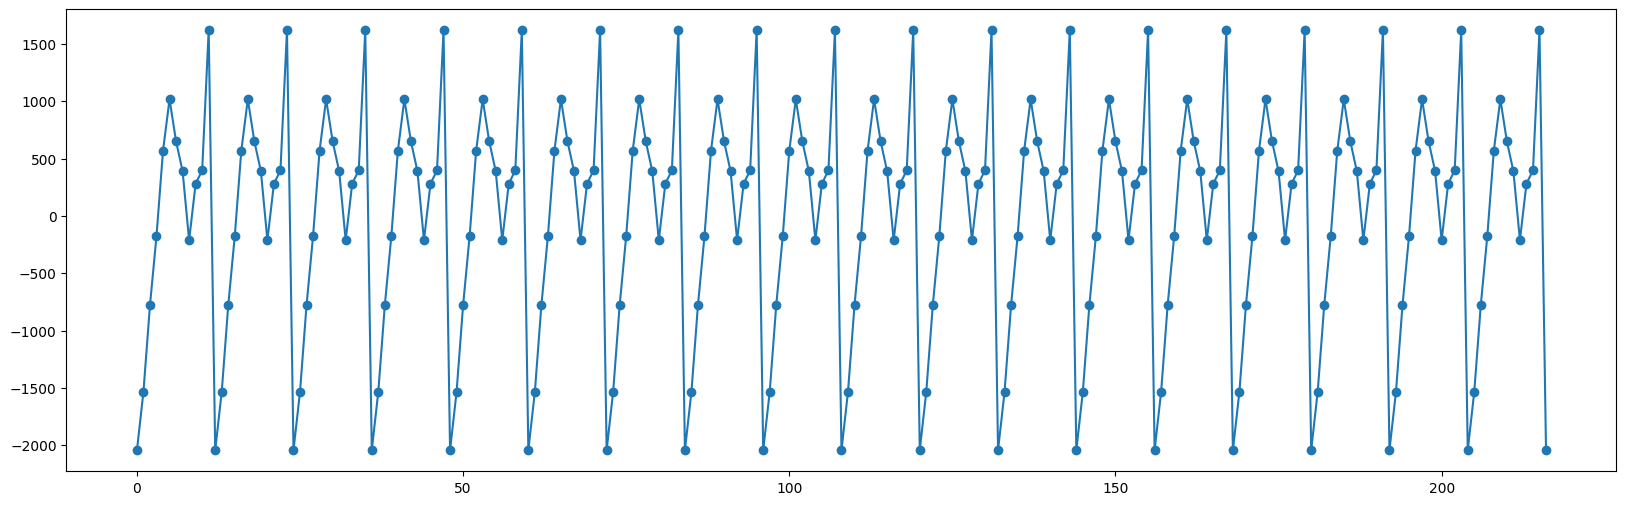

In [33]:
dft['season'] = dft.groupby(dft.DATE.dt.month)['Sales'].transform('mean')
dft['season'].plot(style = '-o')

In [34]:
print(mobile_sales.values[:, 0])

[ 6519.          6654.          7332.          7332.
  8240.          8104.          7813.          8279.
  7014.          7985.          8229.          8618.
  6558.          6882.          7211.          7540.
  7869.          8198.          8396.          8510.
  7589.          8366.          8156.          9415.
  6765.          7048.          7856.          8181.
  8581.          8573.          9008.          8708.
  8074.          9068.          9524.5         9981.
  7071.          7339.          8483.          8536.
  8774.          9355.          8728.          8835.
  8701.          8709.          9170.         10499.
  6994.          7675.          9161.          8699.
  9682.         10198.          8794.          9935.
  9182.          9433.          9684.         10339.
  7507.          8028.           108.          8777.
 10281.         10767.          9233.         10595.
  9475.         10077.         10569.         10987.
  8068.          8185.          9634.         

In [35]:
 print(dft['season'].rolling(12, center = True).mean())

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
Name: season, Length: 217, dtype: float64


C:\Users\ryanr\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


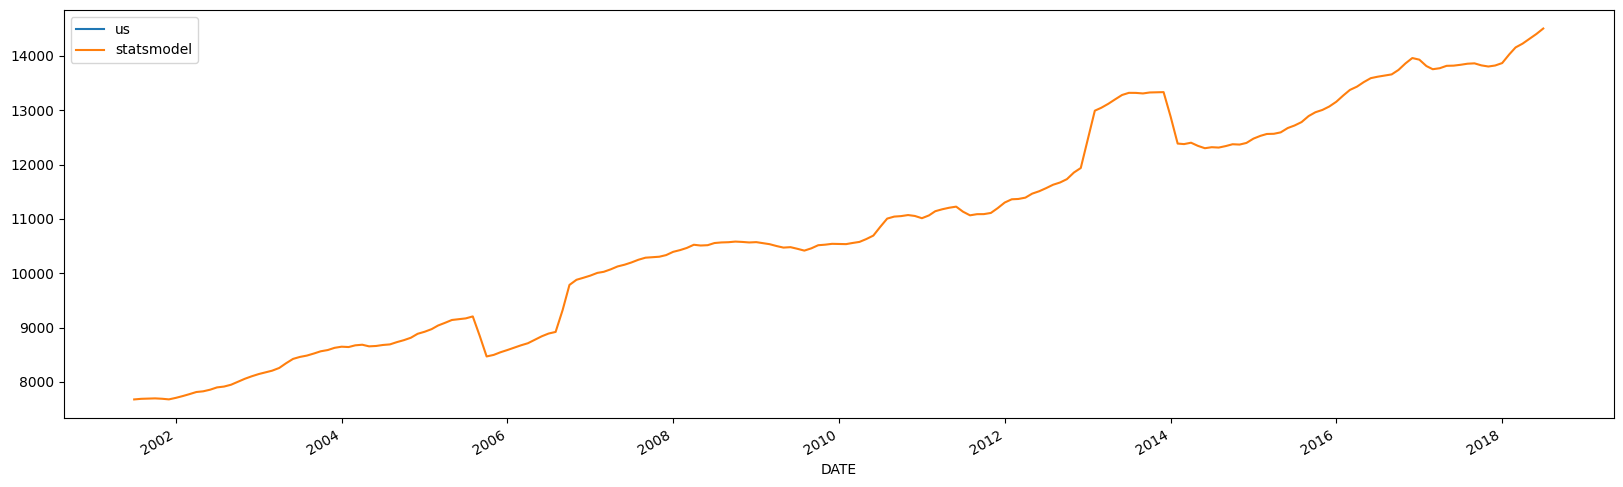

In [36]:
trend_2 = pd.Series((mobile_sales.values[:, 0] - dft['season']).rolling(12, center = True).mean(), index = model.trend.index)
plt.plot(trend_2, label = 'us')
model.trend.plot(label = 'statsmodel')
plt.legend()

## Lecture 2



In [37]:
train_max_date = mobile_sales.index[-12]
train_x = mobile_sales.loc[mobile_sales.index < mobile_sales.index[-12]].copy()
test_x = mobile_sales.loc[mobile_sales.index >= mobile_sales.index[-12]].copy()

In [38]:
train_x.shape, test_x.shape

((205, 1), (12, 1))

In [39]:
#pip install scikit-learn

In [40]:
import sklearn
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae,
    mean_absolute_percentage_error as mape
)

In [41]:
def performance(actual, predicted):
    print('MAE', round(mae(actual, predicted), 3))
    print('RMSE', round(mse(actual, predicted)**0.5, 3))
    print('MAPE', round(mape(actual, predicted), 3))

## Mean Model

In [42]:
test_x['pred'] = train_x['Sales'].mean()
test_x

,Sales,pred
DATE,,
2018-02-01,11852.0,10657.741463
2018-03-01,14123.0,10657.741463
2018-04-01,13360.0,10657.741463
2018-05-01,15576.0,10657.741463
2018-06-01,16021.0,10657.741463
2018-07-01,14080.0,10657.741463
2018-08-01,15697.0,10657.741463
2018-09-01,13838.0,10657.741463
2018-10-01,15351.0,10657.741463


<Axes: xlabel='DATE'>

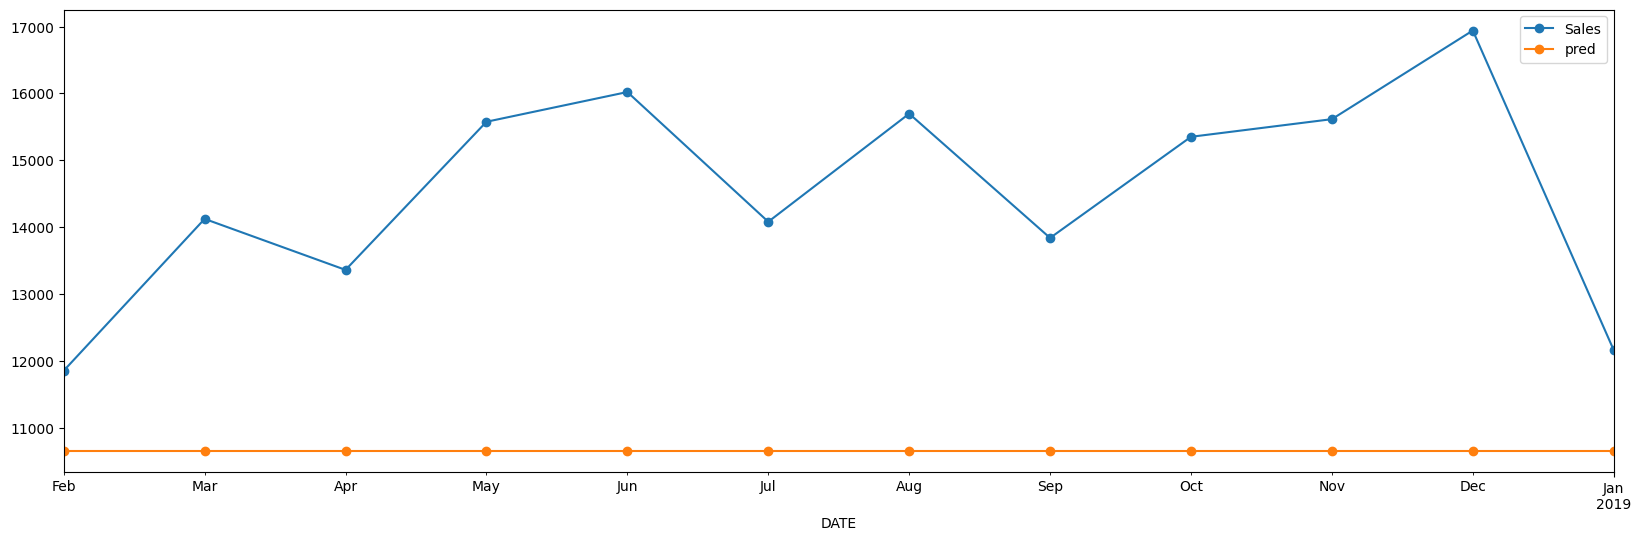

In [43]:
test_x.plot(style='-o')

In [44]:
performance(test_x['Sales'], test_x['pred'])

MAE 3893.425
RMSE 4175.798
MAPE 0.259


## Naive Forecast

MAE 3546.167
RMSE 3854.067
MAPE 0.235


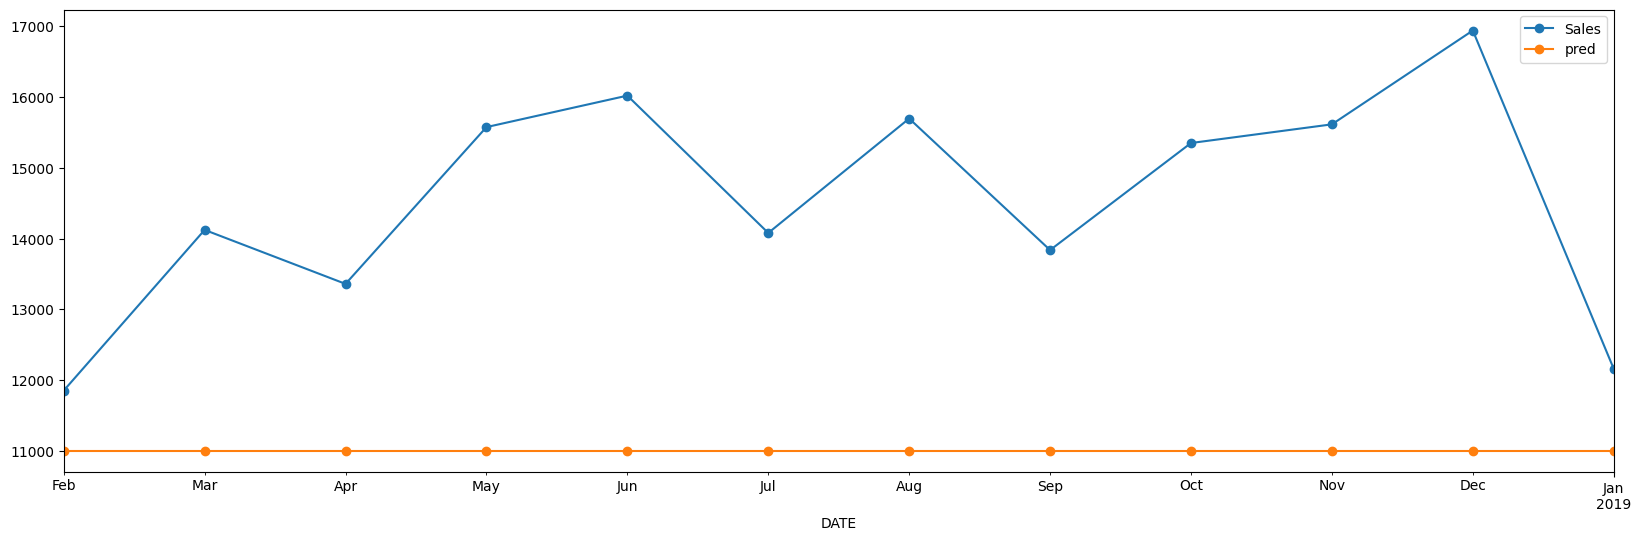

In [45]:
test_x['pred'] = train_x['Sales'].iloc[-1]
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## Seasonal Naive Forecast

MAE 907.417
RMSE 1126.351
MAPE 0.062


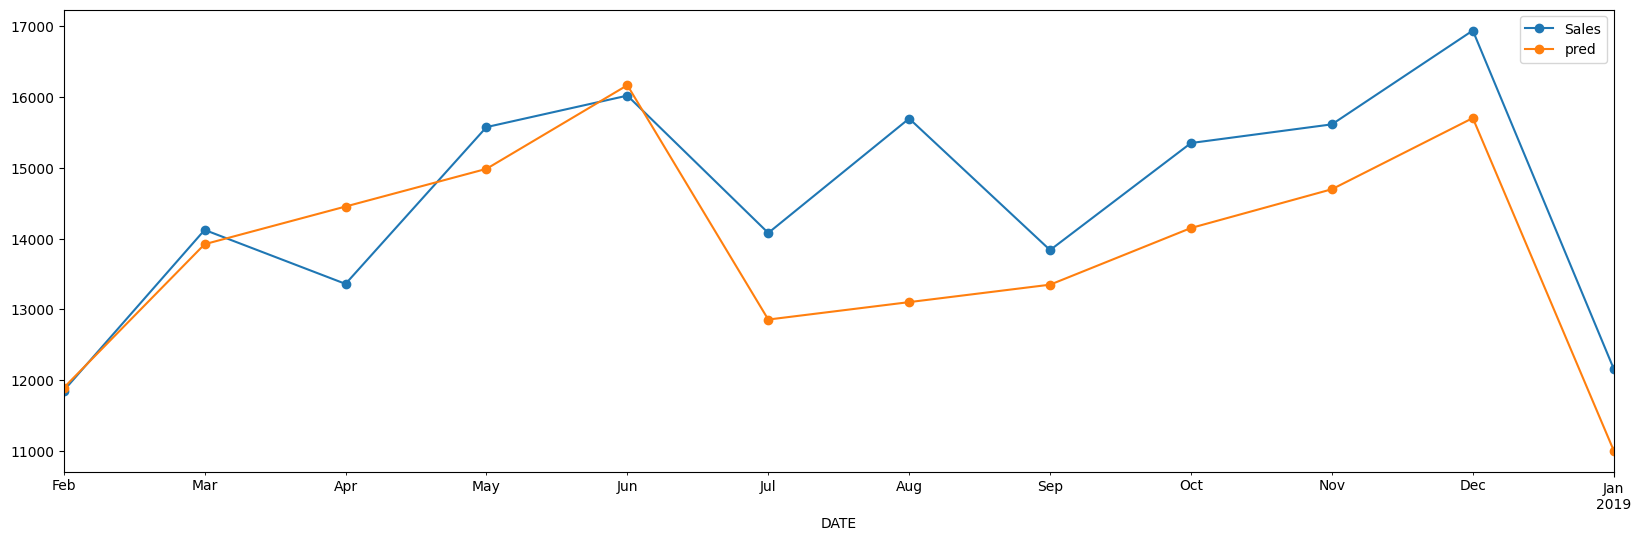

In [46]:
for i in test_x.index:
    test_x.loc[i, 'pred'] = train_x.loc[i - pd.DateOffset(years = 1)]['Sales']
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## Drift Method

In [50]:
y_t = train_x['Sales'].iloc[-1]
y_0 = train_x['Sales'].iloc[0]

m = (y_t - y_0) / len(train_x['Sales'])

h = np.linspace(0, len(train_x['Sales'])-1, len(test_x))

test_x['pred'] = y_t + m * h

In [48]:
y_t + m*4

np.float64(11092.531707317074)

MAE 1866.928
RMSE 2160.269
MAPE 0.128


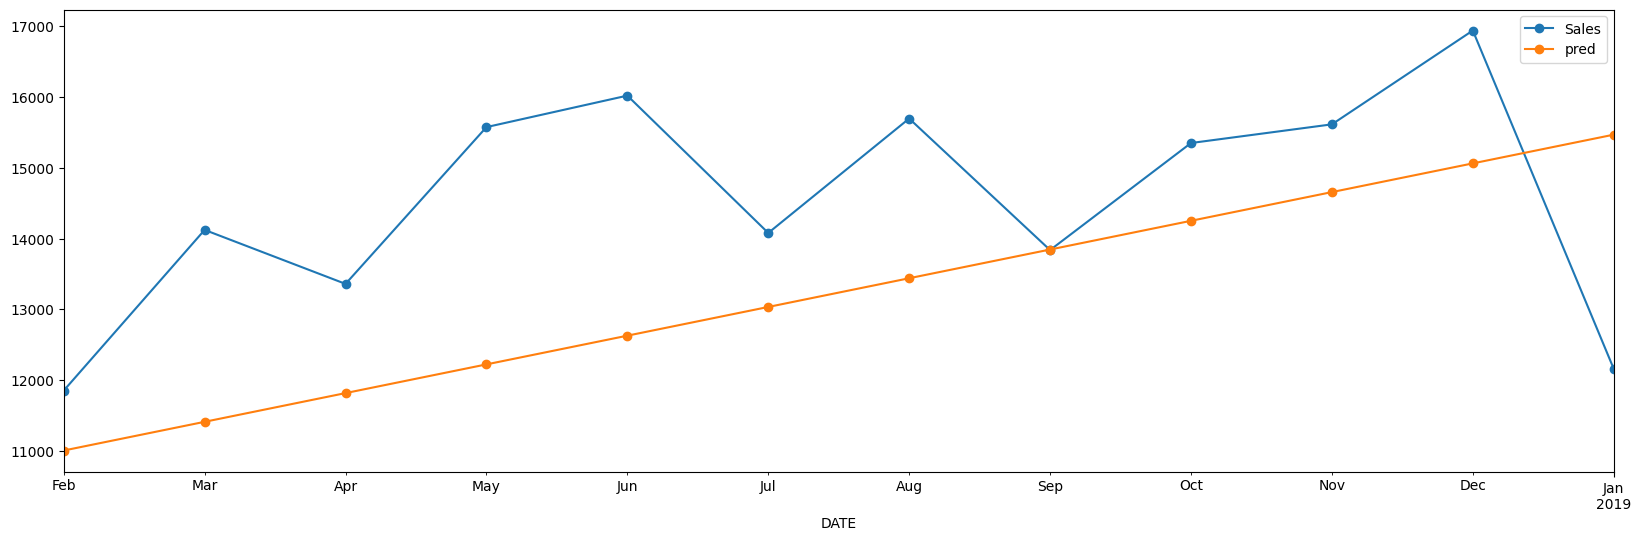

In [51]:
test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])

## Highly sensitive to the slope

MAE 5722.931
RMSE 6371.33
MAPE 0.403


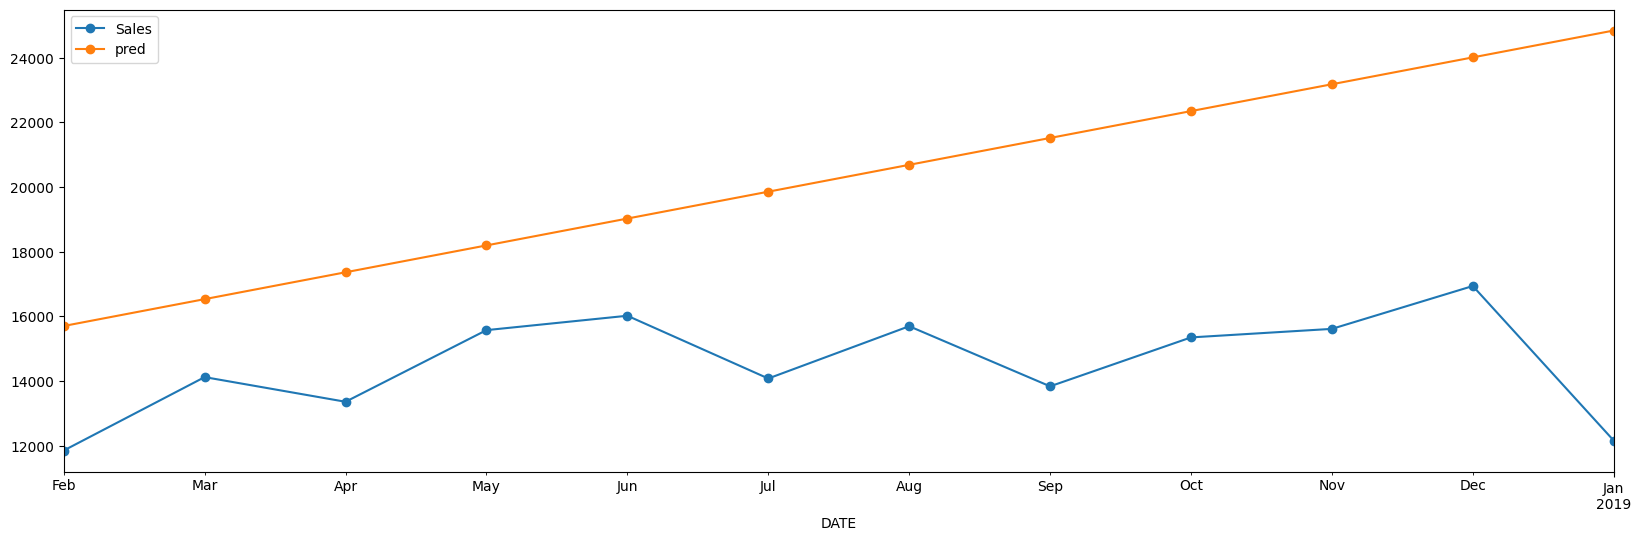

In [57]:
#Here we take the second last value to calculate the slope
y_t = train_x['Sales'].iloc[-2]
y_0 = train_x['Sales'].iloc[0]

m = (y_t - y_0) / len(train_x['Sales'])

h = np.linspace(0, len(train_x['Sales'])-1, len(test_x))

test_x['pred'] = y_t + m * h

test_x.plot(style='-o')
performance(test_x['Sales'], test_x['pred'])